## Plot Buoy Tracks w/ Current Vectors

In [7]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
from datetime import date,datetime,timedelta

Open up ocean parcels particle netcdf file

In [2]:
fname = "Output.nc"
pfile = netCDF4.Dataset(fname)

Grab information of interest from particle netcdf file

In [3]:
lon = np.ma.filled(pfile.variables['lon'], np.nan)
lat = np.ma.filled(pfile.variables['lat'], np.nan)
time_var = pfile.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)
time = np.ma.filled(dtime, np.nan)
z = np.ma.filled(pfile.variables['z'], np.nan)
mesh = pfile.getncattr('parcels_mesh') if 'parcels_mesh' in pfile.getncattr('parcels_mesh') else 'spherical'
#pfile.close()
lons = (lon + 180)%360 - 180   ##- Format longitudes -180 to +180
pfile.close()

Grab closest time IFREMER data from CDIP Syntool THREDDS Server

In [5]:
url = 'http://syntool.cdip.ucsd.edu/thredds/dodsC/raw/IFREMER_GFS_WAVE_MODEL/'
region = 'ATNW-10M'
now = datetime.now() - timedelta(hours=6)
hrs = np.arange(0,24,3)
hr = hrs.flat[np.abs(hrs-now.hour).argmin()]
hr = '%02d'%hr
#datestr = now.strftime('%Y%m%dT%HZ')
datestr = now.strftime('%Y%m%dT')+hr+'Z'
url = url+'MARC_WW3-'+region+'_'+datestr+'.nc'   ##- MARC_WW3-ATNW-10M_20220328T21Z.nc'
dset = netCDF4.Dataset(url)
x = dset.variables['longitude'][:]
y = dset.variables['latitude'][:]
x2d, y2d = np.meshgrid(x, y)
u = np.squeeze(dset.variables['ucur'][:])
v = np.squeeze(dset.variables['vcur'][:])
add_offset = dset.variables['ucur'].add_offset
scale_factor = dset.variables['ucur'].scale_factor
u = u * scale_factor + add_offset
v = v * scale_factor + add_offset
dset.close()

Set up figure/plotting params

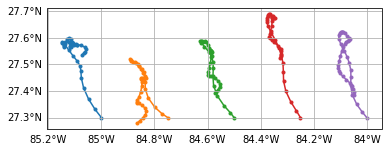

In [8]:
spherical = True;
central_longitude = np.mean(lon)
projection = ccrs.PlateCarree(None);
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
gl = ax.gridlines(crs=projection, draw_labels=True)
gl.top_labels, gl.right_labels = (False, False)
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
ax.grid()
ax.plot(np.transpose(lons), np.transpose(lat), '.-', transform=cartopy.crs.Geodetic());

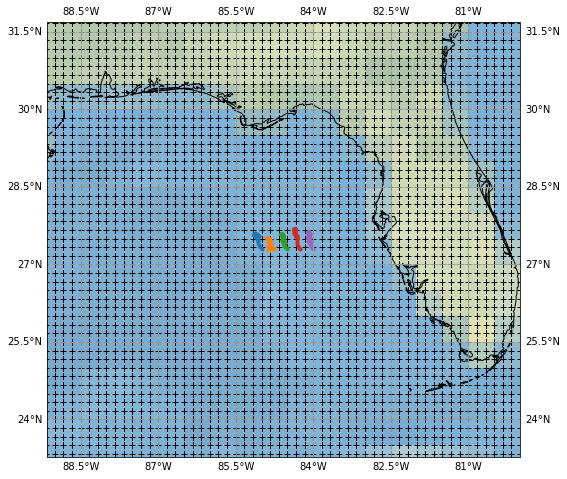

In [15]:
spherical = True;
buff = 4
fig = plt.figure(figsize=(10, 8))
proj = ccrs.LambertConformal();
proj = ccrs.PlateCarree();
ax = plt.axes(projection=proj)
ax.stock_img()
#ax.quiver(x2d,y2d,np.transpose(u),np.transpose(v))
ax.plot(x2d,y2d,'+k')
ax.plot(np.transpose(lons), np.transpose(lat), '.-');
ax.coastlines()
ax.set_extent([np.min(lons)-buff, np.max(lons)+buff, np.min(lat)-buff, np.max(lat)+buff], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=projection, draw_labels=True)
ax.grid()
plt.show()